#### Creating a Class
- 類別常用於封裝投資標的、計算報酬與風險、模擬資產配置等

In [6]:
# Define an investment portfolio class
class InvestmentPortfolio:
    """
    A class to represent an investment portfolio.

    Attributes:
        capital (float): The initial capital of the portfolio.
        risk_level (int): The risk level of the portfolio on a scale from 1 to 10.
    """

    def __init__(self, initial_capital: float, risk_level: int):
        """
        Initializes the InvestmentPortfolio with starting capital and risk level.

        Args:
            initial_capital (float): The starting amount of money in the portfolio.
            risk_level (int): Risk level from 1 (low risk) to 10 (high risk).
        """
        self.capital = initial_capital  # Initial capital
        if 1 <= risk_level <= 10:
            self.risk_level = risk_level  # Risk level (1–10)
        else:
            raise ValueError("Risk level must be between 1 and 10.")

    def calculate_return(self) -> float:
        """
        Calculates the expected return based on capital and risk level.
        Assumes a simple model: return = capital * (1 + risk_level / 100)

        Returns:
            float: Expected return amount.
        """
        return self.capital * (1 + self.risk_level / 100)

    def calculate_volatility(self) -> float:
        """
        Estimates volatility (a measure of risk) as proportional to risk level.
        Simplified model: volatility = risk_level * 0.5

        Returns:
            float: Estimated volatility.
        """
        return self.risk_level * 0.5   

#### Instance 建立實體

In [7]:
# Create an instance of InvestmentPortfolio
portfolio = InvestmentPortfolio(1000000, 7)  # Initial capital: 1,000,000, Risk level: 7

In [8]:
portfolio.capital # initial capital
expected_return = portfolio.calculate_return()
volatility = portfolio.calculate_volatility()

In [9]:
print(f"Initial Capital: ${portfolio.capital:,.2f}")
print(f"Expected Return: ${expected_return:,.2f}")
print(f"Volatility (Risk Estimate): {volatility:.1f}")

Initial Capital: $1,000,000.00
Expected Return: $1,070,000.00
Volatility (Risk Estimate): 3.5


#### instance attributes 實體屬性（Instance Attributes）  
每個實體可以擁有不同的屬性值，例如不同投資人的風險偏好、資產配置等。

In [12]:
class Investor:
    def __init__(self, risk_profile):
        self.risk_profile = risk_profile # investor's risk preference


In [13]:
investor1 = Investor("aggressive") # high-risk investor
investor2 = Investor("conservative") # conservative investor

print(investor1.risk_profile)
print(investor2.risk_profile)

aggressive
conservative


#### class attribute 類別屬性（Class Attribute）  
- Market Condition (Class Attribute): All investors are affected by the same market environment.

In [14]:
class Investor:
    def __init__(self, risk_profile):
        self.risk_profile = risk_profile # instance attribute: investor preference
    market_condition = "bullish" # class attribute: market condition

In [15]:
investor1 = Investor("aggressive")
investor2 = Investor("conservative")

print(investor1.market_condition)
print(investor2.market_condition)

bullish
bullish


In [18]:
class InvestmentFund:
    """
    A class representing an investment fund.
    
    Attributes:
        risk_profile (str): Instance attribute — risk preference of the fund (e.g., aggressive, conservative)
        region (str): Class attribute — all funds are currently managed from the same financial hub (e.g., Taipei)
    """
    region = 'Taiwan'  # Class attribute: All funds operate under the same regional base (like market condition)

    def __init__(self, risk_profile):
        self.risk_profile = risk_profile  # Instance attribute: specific to each fund

# Create two fund instances
fund_growth = InvestmentFund("aggressive")      # Growth-oriented fund
fund_stable = InvestmentFund("conservative")    # Capital preservation fund

# Access instance attributes
print(fund_growth.risk_profile)   # Output: aggressive
print(fund_stable.risk_profile)   # Output: conservative

aggressive
conservative


In [ ]:
# Access class attribute (shared across all instances)
print(fund_growth.region)         # Output: Taiwan
print(fund_stable.region)         # Output: Taiwan

# Access class attribute directly via class
print(InvestmentFund.region)      # Output: Taiwan

Taiwan
Taiwan
Taiwan


#### Modifying Attribute Values 修改屬性值（Modifying Attribute Values）  
可用於更新市場環境、調整投資策略等。

In [20]:
Investor.market_condition = "bearish" # market turns bearish
print(investor1.market_condition)
print(investor2.market_condition)
print(Investor.market_condition)

bearish
bearish
bearish


### Inheritance
繼承可用於建立不同類型的投資標的，例如傳統投資與綠色能源投資。
- for creating different types of investment products, such as stocks and ESG investments.

In [24]:
class FinancialProduct:
    def __init__(self, issuer, product_type, launch_year):
        self.issuer = issuer # issuer
        self.product_type = product_type # product type
        self.launch_year = launch_year # launch year
        self.performance = 0.0 # cumulative return

    def describe_product(self):
        description = f"{self.launch_year} {self.product_type} issued by {self.issuer}"
        return description

    def show_performance(self):
        print(f"This product's cumulative return is {self.performance}%")

In [23]:
class ESGInvestment(FinancialProduct):
    def __init__(self, issuer, product_type, launch_year):
        super().__init__(issuer, product_type, launch_year) # inherit base attributes
        self.sustainability_score = 85 # new attribute: sustainability score

In [25]:
esg_fund = ESGInvestment('Cathay Asset Management', 'ESG Stock Fund', 2023)
print(esg_fund.describe_product())

2023 ESG Stock Fund issued by Cathay Asset Management


#### Multiple Inheritance
可用於結合多種投資策略，例如同時繼承風險管理與報酬管理策略。
- to combine risk management and return optimization strategies.

In [26]:
class RiskControl:
    def strategy(self):
        return "Risk management strategy"

class ReturnOptimization:
    def strategy(self):
        return "Return optimization strategy"

class HybridStrategy(ReturnOptimization, RiskControl): # multiple inheritance
    pass

In [27]:
strategy = HybridStrategy()
print(strategy.strategy()) # Method resolution order: ReturnOptimization takes precedence

Return optimization strategy


### Polymorphism
多型可用於模擬不同投資人對市場的反應方式。
- Different asset classes generate returns in different ways.

In [33]:
class ConservativeStrategy:
    """
    Base class representing a conservative investment strategy.
    """
    MAX_RISK_TOLERANCE = 3  # Low risk tolerance (scale 1–10)

    def execute_strategy(self):
        print("Executing conservative strategy: 60% bonds, 40% stocks")  # Basic investment approach


class AggressiveStrategy(ConservativeStrategy):
    """
    Inherits from ConservativeStrategy but overrides the strategy for higher growth.
    """
    MAX_RISK_TOLERANCE = 7  # Higher risk tolerance

    def execute_strategy(self):
        print("Executing aggressive strategy: 90% equities, 10% alternatives")  # High-growth approach


class BalancedHybridStrategy(ConservativeStrategy):
    """
    A hybrid strategy that combines conservative foundation with active enhancements.
    """
    MAX_RISK_TOLERANCE = 5  # Moderate risk tolerance

    def execute_strategy(self):
        print("Enhancing portfolio with tactical allocation...")  # Active adjustment
        ConservativeStrategy.execute_strategy(self)  # Also apply base conservative logic

In [34]:
# Instantiate the strategies
conservative = ConservativeStrategy()
aggressive = AggressiveStrategy()
hybrid = BalancedHybridStrategy()

# Run each strategy (demonstrating polymorphism)
for strategy in (conservative, aggressive, hybrid):
    strategy.execute_strategy()

# Show risk tolerance levels (class-level constants)
print(f"Conservative Risk Tolerance: {conservative.MAX_RISK_TOLERANCE}")
print(f"Aggressive Risk Tolerance: {aggressive.MAX_RISK_TOLERANCE}")
print(f"Hybrid Risk Tolerance: {hybrid.MAX_RISK_TOLERANCE}") 


Executing conservative strategy: 60% bonds, 40% stocks
Executing aggressive strategy: 90% equities, 10% alternatives
Enhancing portfolio with tactical allocation...
Executing conservative strategy: 60% bonds, 40% stocks
Conservative Risk Tolerance: 3
Aggressive Risk Tolerance: 7
Hybrid Risk Tolerance: 5


In [31]:
class FinancialAsset:
    def __init__(self, name):
        self.name = name

    def return_profile(self):
            pass

class Stock(FinancialAsset):
    def return_profile(self):
        return "High volatility, high return"

class Bond(FinancialAsset):
    def return_profile(self):
        return "Low volatility, stable return"

In [32]:
tsmc = Stock("TSMC")
taiwan_bond = Bond("Taiwan Government Bond")

tsmc.return_profile() # stock investment
taiwan_bond.return_profile() # bond investment

'Low volatility, stable return'

## Additional Information

### How Candles of Candlestick Pattern are Created

Candles of candlestick charts are created based on OHLC (Open, High, Low, and Close Prices).
 
If open price is below close price then green bar is created highlighting that the security price increased (bullish) for that period else red bar is created highlighting a decrease (bearish).

The first library which we'll explore for plotting candlestick charts in Python is <mark>mplfinance</mark>. It used to be available as a matplotlib module earlier but now it has moved out and has become an independent library. 

In [4]:
pip install yfinance mplfinance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

# 1. Download the data
print("Downloading AAPL data...")
aapl = yf.download('AAPL', start='2023-01-01', end='2024-01-01')

# 2. Inspect the data types
print("\nData types:")
print(aapl.dtypes)

# 3. Check for any non-numeric or strange values
print("\nAny NaN values?")
print(aapl.isnull().sum())

# 4. Force conversion to numeric (in case numbers are stored as strings)
cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for col in cols:
    aapl[col] = pd.to_numeric(aapl[col], errors='coerce')  # Convert to numeric, set bad values to NaN

# 5. Drop any rows where key price data is NaN
aapl_clean = aapl.dropna()

# 6. Confirm the data types are now numeric
print("\nAfter cleaning, data types:")
print(aapl_clean.dtypes)

# 7. Optional: Show first few rows to verify
print("\nFirst 5 rows:")
print(aapl_clean.head())

# 8. Now try plotting
print("\nPlotting candlestick chart...")
mpf.plot(aapl_clean,
         type='candle',
         style='charles',
         title='AAPL Stock - Candlestick Chart',
         ylabel='Price ($)',
         volume=True,
         figsize=(12, 8))

# Example 1: Basic candlestick chart
print("\nCreating basic candlestick chart...")
mpf.plot(aapl, 
         type='candle', 
         style='charles',
         title='AAPL Stock - Candlestick Chart',
         ylabel='Price ($)',
         volume=True,
         figsize=(12, 8))

# Example 2: OHLC chart with moving averages
print("\nCreating OHLC chart with moving averages...")
mpf.plot(aapl,
         type='ohlc',
         style='binance',
         title='AAPL Stock - OHLC with Moving Averages',
         ylabel='Price ($)',
         volume=True,
         mav=(10, 20, 50),  # 10, 20, and 50-day moving averages
         figsize=(12, 8))

# Example 3: Renko chart (requires additional processing)
print("\nCreating line chart with technical indicators...")

# Add some technical indicators
aapl['SMA_20'] = aapl['Close'].rolling(window=20).mean()
aapl['SMA_50'] = aapl['Close'].rolling(window=50).mean()
aapl['EMA_12'] = aapl['Close'].ewm(span=12).mean()

# Create custom colors
colors = ['tab:red', 'tab:blue', 'tab:orange']

mpf.plot(aapl,
         type='candle',
         style='yahoo',
         title='AAPL Stock - With Moving Averages',
         ylabel='Price ($)',
         volume=True,
         addplot=[
             mpf.make_addplot(aapl['SMA_20'], color=colors[0], width=1),
             mpf.make_addplot(aapl['SMA_50'], color=colors[1], width=1),
             mpf.make_addplot(aapl['EMA_12'], color=colors[2], width=1, secondary_y=False)
         ],
         figsize=(14, 10))

# Example 4: Custom styled chart
print("\nCreating custom styled chart...")

# Create a custom style
custom_style = mpf.make_mpf_style(
    base_mpf_style='yahoo',
    rc={'font.size': 10},
    gridstyle='-',
    y_on_right=True
)

mpf.plot(aapl.iloc[-60:],  # Last 60 days for better detail
         type='candle',
         style=custom_style,
         title='AAPL Stock - Recent Performance (Last 60 Days)',
         ylabel='Price ($)',
         volume=True,
         mav=(7, 14),
         figratio=(14, 8),
         figscale=1.2,
         xrotation=15)

# Example 5: Show basic statistics and plot
print("\nBasic Statistics:")
print(aapl['Close'].describe())

# Show the last few closing prices
print(f"\nRecent closing prices:")
print(aapl['Close'].tail())

In [1]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
from datetime import datetime

# Download BTC-USD data
data = yf.Ticker("BTC-USD")
df_btc = data.history(start="2024-01-01",end="2030-12-31").tz_localize(None) # importance
df_btc = df_btc.drop(['Dividends', 'Stock Splits'], axis=1)
df_btc.dropna(inplace=True)
df_btc.info()

# Select required columns
df_btc = df_btc[['Open', 'High', 'Low', 'Close', 'Volume']]

# Print data info for debugging
print("Data types:\n", df_btc.dtypes)
print("NaN values:\n", df_btc.isna().sum())
print("First few rows:\n", df_btc.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 605 entries, 2024-01-01 to 2025-08-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    605 non-null    float64
 1   High    605 non-null    float64
 2   Low     605 non-null    float64
 3   Close   605 non-null    float64
 4   Volume  605 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 28.4 KB
Data types:
 Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object
NaN values:
 Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
First few rows:
                     Open          High           Low         Close  \
Date                                                                 
2024-01-01  42280.234375  44175.437500  42214.976562  44167.332031   
2024-01-02  44187.140625  45899.707031  44176.949219  44957.968750   
2024-01-03  44961.601562  45503.242188  40813.535156  42848.175781 

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


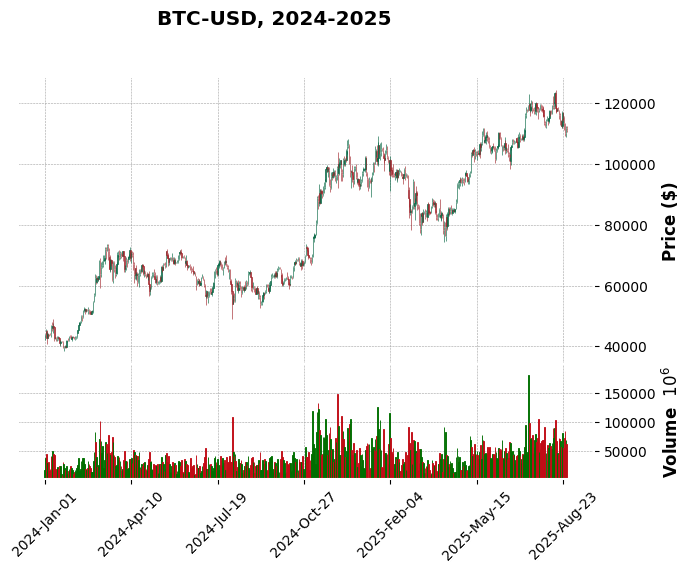

In [3]:
mpf.plot(
            df_btc,
            type='candle',
            style='charles', # mike
            title='BTC-USD, 2024-2025',
            volume=True,
            ylabel='Price ($)'
        )

In [5]:
# Moving average over a window of 3 and 8
df_btc['moving3'] = df_btc['Close'].rolling(3).mean().dropna()
df_btc['moving8'] = df_btc['Close'].rolling(8).mean().dropna()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


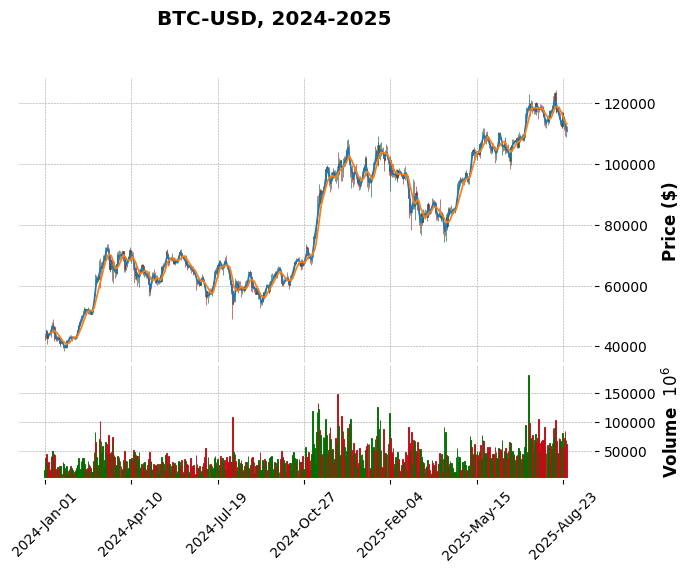

In [6]:
sma = mpf.make_addplot(df_btc[["moving3", "moving8"]])


mpf.plot(
            df_btc,
            type='candle',
            addplot = sma ,
            style='charles', # mike
            title='BTC-USD, 2024-2025',
            volume=True,
            ylabel='Price ($)',
            )

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


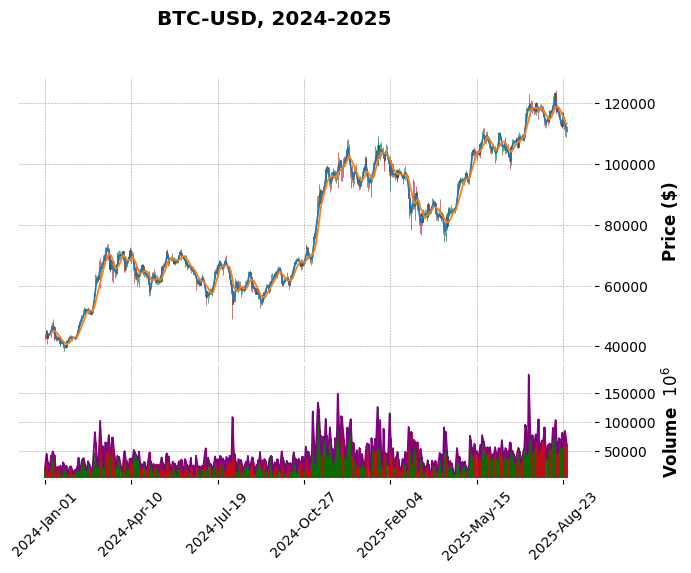

In [7]:
sma = mpf.make_addplot(df_btc[["moving3", "moving8"]])
## Adding data to volume subplot
volume = mpf.make_addplot(df_btc["Volume"], color="purple",
                           panel=1
                          )

mpf.plot(
            df_btc,
            type='candle',
            addplot = [sma , volume],
            style='charles', # mike
            title='BTC-USD, 2024-2025',
            volume=True,
            ylabel='Price ($)',
            )

<mark>Plotly</mark> is another Python library that provides functionality to create candlestick charts. It allows us to create interactive candlestick charts.

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
import plotly
import plotly.graph_objects as go

candlestick = go.Candlestick(
                            x=df_btc.index,
                            open=df_btc['Open'],
                            high=df_btc['High'],
                            low=df_btc['Low'],
                            close=df_btc['Close'],
                            increasing_line_color= 'red', decreasing_line_color= 'green',
                            )

fig = go.Figure(data=[candlestick])
fig.update_layout(xaxis_rangeslider_visible=False,
                  title="BTC-USD, 2024-2025",
                yaxis_title='BTC-USD, 2024 Stock')
fig.show()

In [9]:
candlestick = go.Candlestick(
                            x=df_btc.index,
                            open=df_btc['Open'],
                            high=df_btc['High'],
                            low=df_btc['Low'],
                            close=df_btc['Close'],
                            increasing_line_color= 'red', decreasing_line_color= 'green',
                            )

                         # Add the moving average
sma3 = go.Scatter(x=df_btc.index,
                  y=df_btc['moving3'],
                  name = "sma3")
                      # Add the moving average
sma8 = go.Scatter(x=df_btc.index,
                  y=df_btc['moving8'],
                  name="sma8")
                     

fig = go.Figure(data=[candlestick, sma3, sma8])
fig.update_layout(xaxis_rangeslider_visible=False,
                  title="BTC-USD, 2024-2025",
                yaxis_title='BTC-USD, 2024 Stock')
fig.show()